## **Section 1: Setup and Installations**

In [ ]:
# Install simpletransformers if not already installed
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00
   ━━━

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import re

# Mount Google Drive
drive.mount('/content/drive')

# Load Amazon dataset
amazon_path = '/content/drive/MyDrive/NLP/amazon.csv'
amazon_data = pd.read_csv(amazon_path)

# Load IMDB dataset
imdb_path = '/content/drive/MyDrive/NLP/imdbsmall.csv'
imdb_data = pd.read_csv(imdb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Section 2: Data Preprocessing - Amazon**

In [ ]:
# Preprocess Amazon data
amazon_label_mapping = {'Shipping': 0, 'Pricing': 1, 'Packaging': 2, 'Service': 3, 'Quality': 4}
amazon_data['label'] = amazon_data['category'].map(amazon_label_mapping)

# Split into train and validation
amazon_train, amazon_val = train_test_split(amazon_data, test_size=0.2, random_state=42)

# Prepare for model
amazon_train_df = pd.DataFrame({
    'text': amazon_train['review'],
    'labels': amazon_train['label']
})

amazon_val_df = pd.DataFrame({
    'text': amazon_val['review'],
    'labels': amazon_val['label']
})

## **Section 3: Data Preprocessing - IMDB**

In [ ]:
# Preprocess IMDB data
imdb_label_mapping = {'positive': 1, 'negative': 0}
imdb_data['label'] = imdb_data['sentiment'].map(imdb_label_mapping)

# Split into train and validation
imdb_train, imdb_val = train_test_split(imdb_data, test_size=0.2, random_state=42)

# Prepare for model
imdb_train_df = pd.DataFrame({
    'text': imdb_train['review'],
    'labels': imdb_train['label']
})

imdb_val_df = pd.DataFrame({
    'text': imdb_val['review'],
    'labels': imdb_val['label']
})

## **Section 4: Text Cleaning Function**

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to both datasets
amazon_train_df['text'] = amazon_train_df['text'].apply(clean_text)
amazon_val_df['text'] = amazon_val_df['text'].apply(clean_text)
imdb_train_df['text'] = imdb_train_df['text'].apply(clean_text)
imdb_val_df['text'] = imdb_val_df['text'].apply(clean_text)

## **Section 5: Model Setup - Amazon**

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Amazon model args
amazon_args = ClassificationArgs(
    num_train_epochs=3,
    train_batch_size=8,
    eval_batch_size=8,
    learning_rate=3e-5,
    max_seq_length=128,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_steps=50,
    save_steps=200,
    evaluate_during_training=True,
    evaluate_during_training_steps=50,
    save_best_model=True,
    overwrite_output_dir=True
)

# Initialize Amazon model (BERT)
amazon_model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=5,
    args=amazon_args,
    use_cuda=True
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **Section 6: Model Setup - IMDB**

In [ ]:
# IMDB model args
imdb_args = ClassificationArgs(
    num_train_epochs=3,
    train_batch_size=8,
    eval_batch_size=8,
    learning_rate=3e-5,
    max_seq_length=128,
    weight_decay=0.01,
    warmup_ratio=0.1,
    logging_steps=50,
    save_steps=200,
    evaluate_during_training=True,
    evaluate_during_training_steps=50,
    save_best_model=True,
    overwrite_output_dir=True
)

# Initialize IMDB model (RoBERTa)
imdb_model = ClassificationModel(
    'roberta',
    'roberta-base',
    num_labels=2,
    args=imdb_args,
    use_cuda=True
)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## **Section 7: Model Training - Amazon**

In [ ]:
print("Training Amazon review classifier...")
amazon_model.train_model(amazon_train_df, eval_df=amazon_val_df)

Training Amazon review classifier...


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/101 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/101 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 3:   0%|          | 0/101 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(303,
 defaultdict(list,
             {'global_step': [50, 100, 101, 150, 200, 202, 250, 300, 303],
              'train_loss': [1.16717529296875,
               0.281524658203125,
               0.268341064453125,
               0.062442779541015625,
               0.02611541748046875,
               0.04203987121582031,
               0.012731552124023438,
               0.011302947998046875,
               0.027202606201171875],
              'mcc': [np.float64(0.6040992070392899),
               np.float64(0.9074625551004418),
               np.float64(0.9074625551004418),
               np.float64(0.9382856162280666),
               np.float64(0.9630402658366685),
               np.float64(0.9630402658366685),
               np.float64(0.9755230401324249),
               np.float64(0.9691906969591622),
               np.float64(0.9691906969591622)],
              'eval_loss': [1.093109130859375,
               0.40097280649038464,
               0.3829058133638822,
               

## **Section 8: Model Training - IMDB**

In [ ]:
print("Training IMDB sentiment classifier...")
imdb_model.train_model(imdb_train_df, eval_df=imdb_val_df)

Training IMDB sentiment classifier...


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(300,
 defaultdict(list,
             {'global_step': [50, 100, 100, 150, 200, 200, 250, 300, 300],
              'train_loss': [0.442657470703125,
               0.15058517456054688,
               0.15058517456054688,
               0.46846628189086914,
               0.050049781799316406,
               0.050049781799316406,
               0.017899751663208008,
               1.0401866436004639,
               1.0401866436004639],
              'mcc': [np.float64(0.4542249744540397),
               np.float64(0.6851751790887421),
               np.float64(0.6851751790887421),
               np.float64(0.7659129179025981),
               np.float64(0.7535448433820815),
               np.float64(0.7535448433820815),
               np.float64(0.7595752764966471),
               np.float64(0.7427884615384616),
               np.float64(0.7427884615384616)],
              'accuracy': [0.685,
               0.835,
               0.835,
               0.88,
               0.875,
          

## **Section 9: Evaluation Functions**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, eval_df):
    result, _, _ = model.eval_model(
        eval_df,
        accuracy=accuracy_score,
        precision=lambda labels, preds: precision_score(labels, preds, average='weighted'),
        recall=lambda labels, preds: recall_score(labels, preds, average='weighted'),
        f1=lambda labels, preds: f1_score(labels, preds, average='weighted')
    )
    return result

## **Section 10: Model Evaluation**

In [ ]:
print("\nAmazon Model Evaluation:")
amazon_eval = evaluate_model(amazon_model, amazon_val_df)
print(amazon_eval)

print("\nIMDB Model Evaluation:")
imdb_eval = evaluate_model(imdb_model, imdb_val_df)
print(imdb_eval)


Amazon Model Evaluation:


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


{'mcc': np.float64(0.9691906969591622), 'accuracy': 0.9752475247524752, 'precision': 0.9758552472326605, 'recall': 0.9752475247524752, 'f1': 0.9752535966082337, 'eval_loss': 0.0920104797069843}

IMDB Model Evaluation:


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


{'mcc': np.float64(0.7427884615384616), 'accuracy': 0.87, 'f1_score': 0.87, 'tp': np.int64(87), 'tn': np.int64(87), 'fp': np.int64(17), 'fn': np.int64(9), 'auroc': np.float64(0.9530248397435898), 'auprc': np.float64(0.947291581891478), 'precision': 0.8727884615384616, 'recall': 0.87, 'f1': 0.87, 'eval_loss': 0.5314224195480347}


## **Section 11: Saving Models**

In [ ]:
# Save Amazon model
amazon_model.save_model('/content/amazon_bert_model')
amazon_model.model.save_pretrained('/content/amazon_bert_model')
amazon_model.tokenizer.save_pretrained('/content/amazon_bert_model')

# Save IMDB model
imdb_model.save_model('/content/imdb_roberta_model')
imdb_model.model.save_pretrained('/content/imdb_roberta_model')
imdb_model.tokenizer.save_pretrained('/content/imdb_roberta_model')

print("\nModels saved successfully!")


Models saved successfully!


## **Section 12: Real World Example Predictions**

In [ ]:
# Amazon review examples
amazon_examples = [
    "The product arrived damaged due to poor packaging",
    "This is way too expensive for what you get",
    "Excellent quality, would buy again",
    "Customer service was terrible, took weeks to get a response",
    "The shipping was fast but the item was defective"
]

# IMDB review examples
imdb_examples = [
    "This movie was fantastic! The acting was superb and the plot kept me engaged throughout.",
    "Terrible film with bad acting and a predictable storyline. Would not recommend.",
    "The cinematography was beautiful but the story was lacking depth.",
    "One of the worst movies I've ever seen. Complete waste of time."
]

# Predict with Amazon model
amazon_preds, _ = amazon_model.predict(amazon_examples)
print("\nAmazon Review Predictions:")
for text, pred in zip(amazon_examples, amazon_preds):
    category = list(amazon_label_mapping.keys())[list(amazon_label_mapping.values()).index(pred)]
    print(f"Review: {text[:50]}... | Predicted: {category}")

# Predict with IMDB model
imdb_preds, _ = imdb_model.predict(imdb_examples)
print("\nIMDB Review Predictions:")
for text, pred in zip(imdb_examples, imdb_preds):
    sentiment = "positive" if pred == 1 else "negative"
    print(f"Review: {text[:50]}... | Predicted: {sentiment}")

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Amazon Review Predictions:
Review: The product arrived damaged due to poor packaging... | Predicted: Packaging
Review: This is way too expensive for what you get... | Predicted: Pricing
Review: Excellent quality, would buy again... | Predicted: Pricing
Review: Customer service was terrible, took weeks to get a... | Predicted: Service
Review: The shipping was fast but the item was defective... | Predicted: Shipping


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


IMDB Review Predictions:
Review: This movie was fantastic! The acting was superb an... | Predicted: positive
Review: Terrible film with bad acting and a predictable st... | Predicted: negative
Review: The cinematography was beautiful but the story was... | Predicted: positive
Review: One of the worst movies I've ever seen. Complete w... | Predicted: negative


In [ ]:
!pip install matplotlib seaborn wordcloud scikit-learn


## **Section 13: Exploratory Data Analysis (EDA)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎯 AMAZON REVIEW CATEGORY DISTRIBUTION


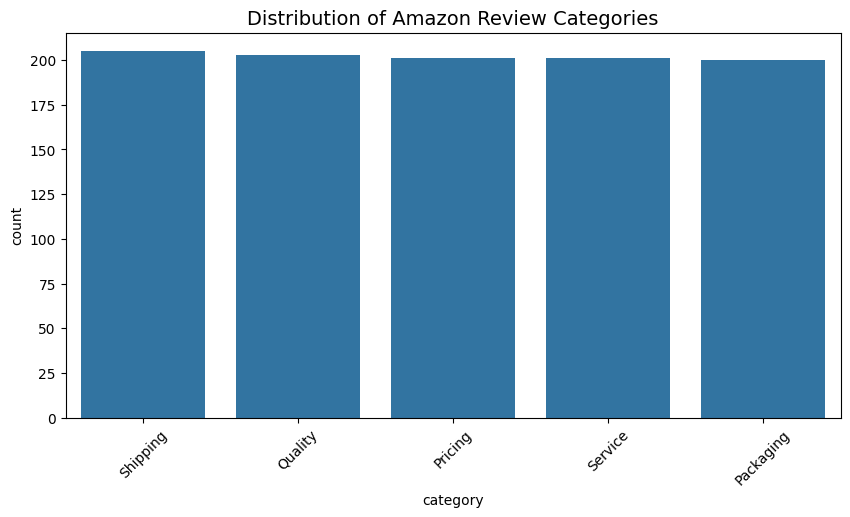


📏 AMAZON TEXT LENGTH ANALYSIS


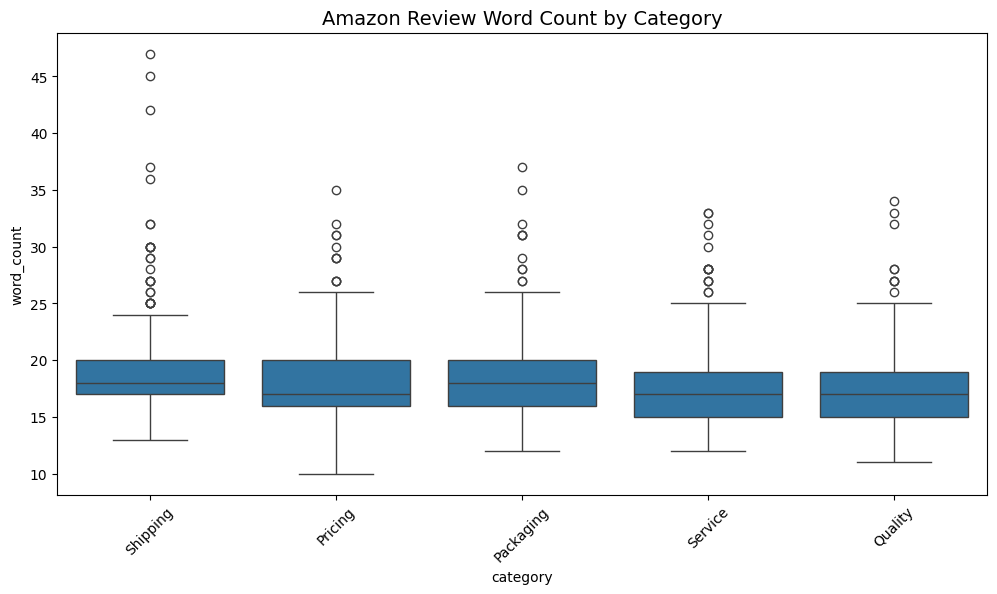


☁️ AMAZON WORD CLOUD FOR 'Shipping' CATEGORY


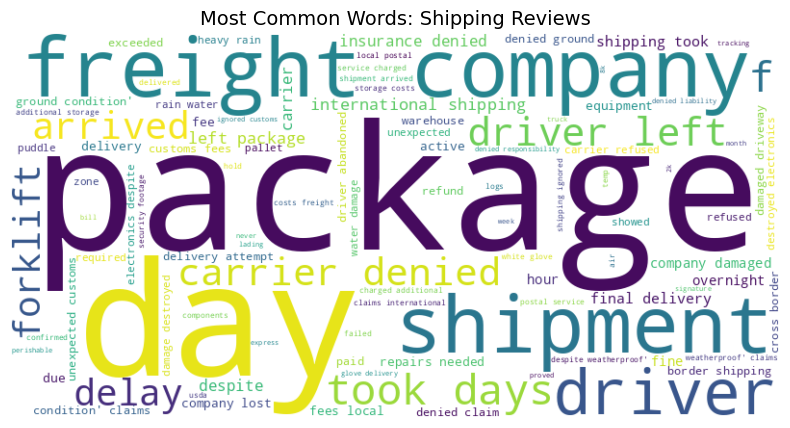


🔑 AMAZON TOP KEYWORDS BY CATEGORY

Category: Shipping
Top keywords: carrier, days, delivery, driver, package

Category: Pricing
Top keywords: checkout, failed, matched, price, pricing

Category: Packaging
Top keywords: arrived, box, packaging, shattered, shipped

Category: Service
Top keywords: customer, repair, required, service, warranty

Category: Quality
Top keywords: coating, failed, revealed, steel, tests

🎯 IMDB SENTIMENT DISTRIBUTION


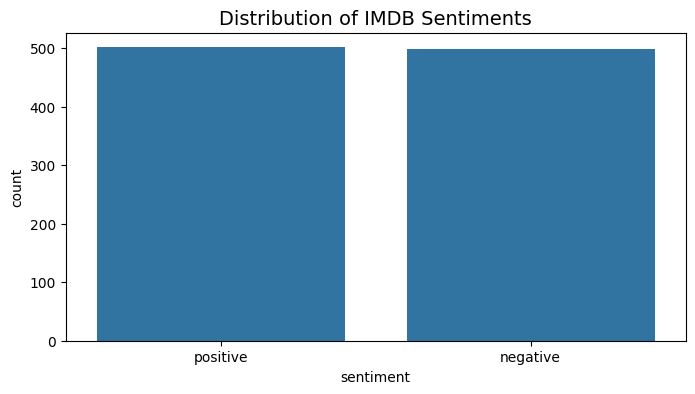


📏 IMDB TEXT LENGTH ANALYSIS


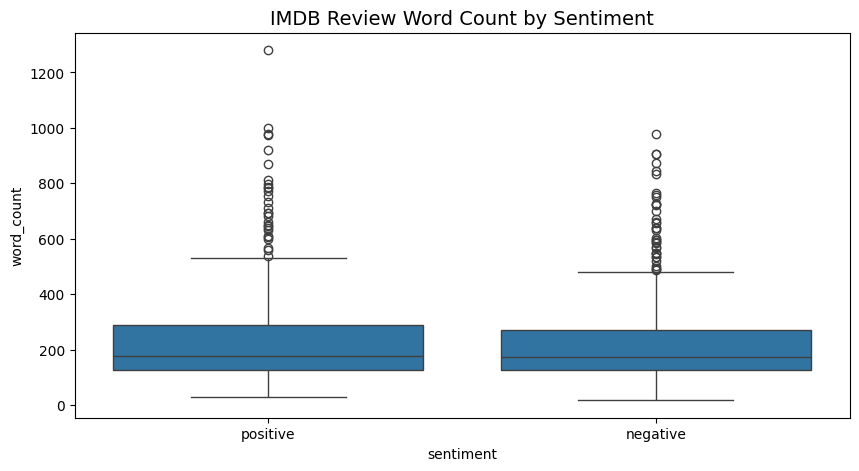


☁️ IMDB WORD CLOUD FOR POSITIVE REVIEWS


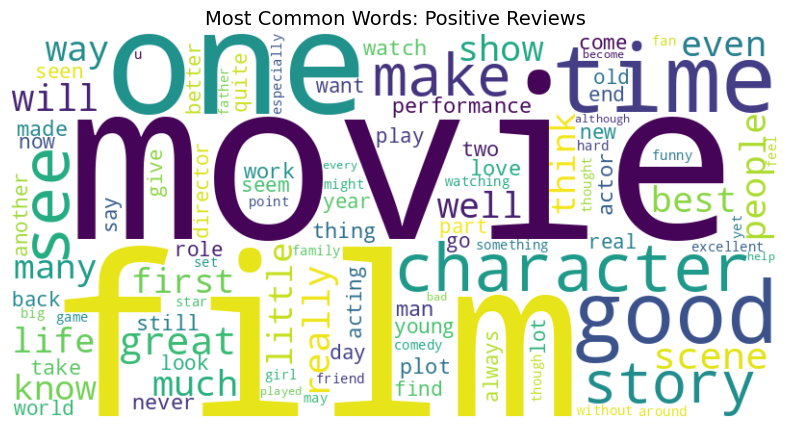


🔑 IMDB TOP KEYWORDS BY SENTIMENT

Sentiment: positive
Top keywords: film, good, just, like, movie

Sentiment: negative
Top keywords: bad, film, just, like, movie


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer

# ==============================================
# For Amazon Reviews Dataset
# ==============================================
# Mount Google Drive
drive.mount('/content/drive')

# Load Amazon dataset
amazon_path = '/content/drive/MyDrive/NLP/amazon.csv'
amazon_data = pd.read_csv(amazon_path)


amazon_target_col = 'category'
amazon_text_col = 'review'

# 1. Target Distribution Plot for Amazon
print("🎯 AMAZON REVIEW CATEGORY DISTRIBUTION")
print("="*50)
plt.figure(figsize=(10,5))
ax = sns.countplot(x=amazon_target_col, data=amazon_data,
                   order=amazon_data[amazon_target_col].value_counts().index)
plt.title("Distribution of Amazon Review Categories", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2. Text Length Analysis for Amazon
print("\n📏 AMAZON TEXT LENGTH ANALYSIS")
print("="*50)

amazon_data['char_count'] = amazon_data[amazon_text_col].apply(lambda x: len(str(x)))
amazon_data['word_count'] = amazon_data[amazon_text_col].apply(lambda x: len(str(x).split()))

# Boxplot for word count by category
plt.figure(figsize=(12, 6))
sns.boxplot(x=amazon_target_col, y='word_count', data=amazon_data)
plt.title("Amazon Review Word Count by Category", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3. Word Cloud for Amazon (Shipping category example)
print("\n☁️ AMAZON WORD CLOUD FOR 'Shipping' CATEGORY")
print("="*50)
shipping_text = ' '.join(amazon_data[amazon_data[amazon_target_col]=='Shipping'][amazon_text_col].apply(lambda x: str(x).lower()))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(shipping_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Common Words: Shipping Reviews", fontsize=14)
plt.axis('off')
plt.show()

# 4. Top Keywords by Amazon Category
print("\n🔑 AMAZON TOP KEYWORDS BY CATEGORY")
print("="*50)

for category in amazon_data[amazon_target_col].unique():
    category_texts = amazon_data[amazon_data[amazon_target_col]==category][amazon_text_col].apply(lambda x: str(x).lower())
    cv = CountVectorizer(stop_words='english', max_features=5)
    cv.fit(category_texts)
    top_words = cv.get_feature_names_out()

    print(f"\nCategory: {category}")
    print("Top keywords:", ", ".join(top_words))

# ==============================================
# For IMDB Reviews Dataset
# ==============================================

# Load IMDB dataset
imdb_path = '/content/drive/MyDrive/NLP/imdbsmall.csv'
imdb_data = pd.read_csv(imdb_path)
imdb_target_col = 'sentiment'
imdb_text_col = 'review'

# 1. Target Distribution Plot for IMDB
print("\n🎯 IMDB SENTIMENT DISTRIBUTION")
print("="*50)
plt.figure(figsize=(8,4))
ax = sns.countplot(x=imdb_target_col, data=imdb_data,
                   order=imdb_data[imdb_target_col].value_counts().index)
plt.title("Distribution of IMDB Sentiments", fontsize=14)
plt.show()

# 2. Text Length Analysis for IMDB
print("\n📏 IMDB TEXT LENGTH ANALYSIS")
print("="*50)

imdb_data['char_count'] = imdb_data[imdb_text_col].apply(lambda x: len(str(x)))
imdb_data['word_count'] = imdb_data[imdb_text_col].apply(lambda x: len(str(x).split()))

# Boxplot for word count by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(x=imdb_target_col, y='word_count', data=imdb_data)
plt.title("IMDB Review Word Count by Sentiment", fontsize=14)
plt.show()

# 3. Word Cloud for IMDB (Positive reviews)
print("\n☁️ IMDB WORD CLOUD FOR POSITIVE REVIEWS")
print("="*50)
positive_text = ' '.join(imdb_data[imdb_data[imdb_target_col]=='positive'][imdb_text_col].apply(lambda x: str(x).lower()))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Common Words: Positive Reviews", fontsize=14)
plt.axis('off')
plt.show()

# 4. Top Keywords by IMDB Sentiment
print("\n🔑 IMDB TOP KEYWORDS BY SENTIMENT")
print("="*50)

for sentiment in imdb_data[imdb_target_col].unique():
    sentiment_texts = imdb_data[imdb_data[imdb_target_col]==sentiment][imdb_text_col].apply(lambda x: str(x).lower())
    cv = CountVectorizer(stop_words='english', max_features=5)
    cv.fit(sentiment_texts)
    top_words = cv.get_feature_names_out()

    print(f"\nSentiment: {sentiment}")
    print("Top keywords:", ", ".join(top_words))